In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [9]:
combined_generation_scores = pd.read_csv('/data/group_data/maartens_lab_miis24/QL_result/gpt-4o-mini/combined_generation_score_avg.csv')
combined_generation_scores

,dataset,linguistics,retrieval_model,generation_model,modified,Metric,Score
0,natural_questions,edited_query_char,none_retrieval,Qwen2.5-7B-Instruct,modified,AI,0.276400
1,natural_questions,edited_query_char,none_retrieval,Qwen2.5-7B-Instruct,modified,EM,0.145800
2,natural_questions,edited_query_char,none_retrieval,Qwen2.5-7B-Instruct,modified,F1,0.265483
3,natural_questions,edited_query_char,none_retrieval,Qwen2.5-7B-Instruct,modified,BERTScore,0.218150
4,natural_questions,edited_query_char,none_retrieval,Qwen2.5-7B-Instruct,modified,ROUGE-1,0.274987
...,...,...,...,...,...,...,...
7884,ms_marco_wikipedia,readability,none_retrieval,gemma-2-9b-it,original,F1,0.227227
7885,ms_marco_wikipedia,readability,none_retrieval,gemma-2-9b-it,original,BERTScore,0.095341
7886,ms_marco_wikipedia,readability,none_retrieval,gemma-2-9b-it,original,ROUGE-1,0.244645
7887,ms_marco_wikipedia,readability,none_retrieval,gemma-2-9b-it,original,ROUGE-2,0.064042


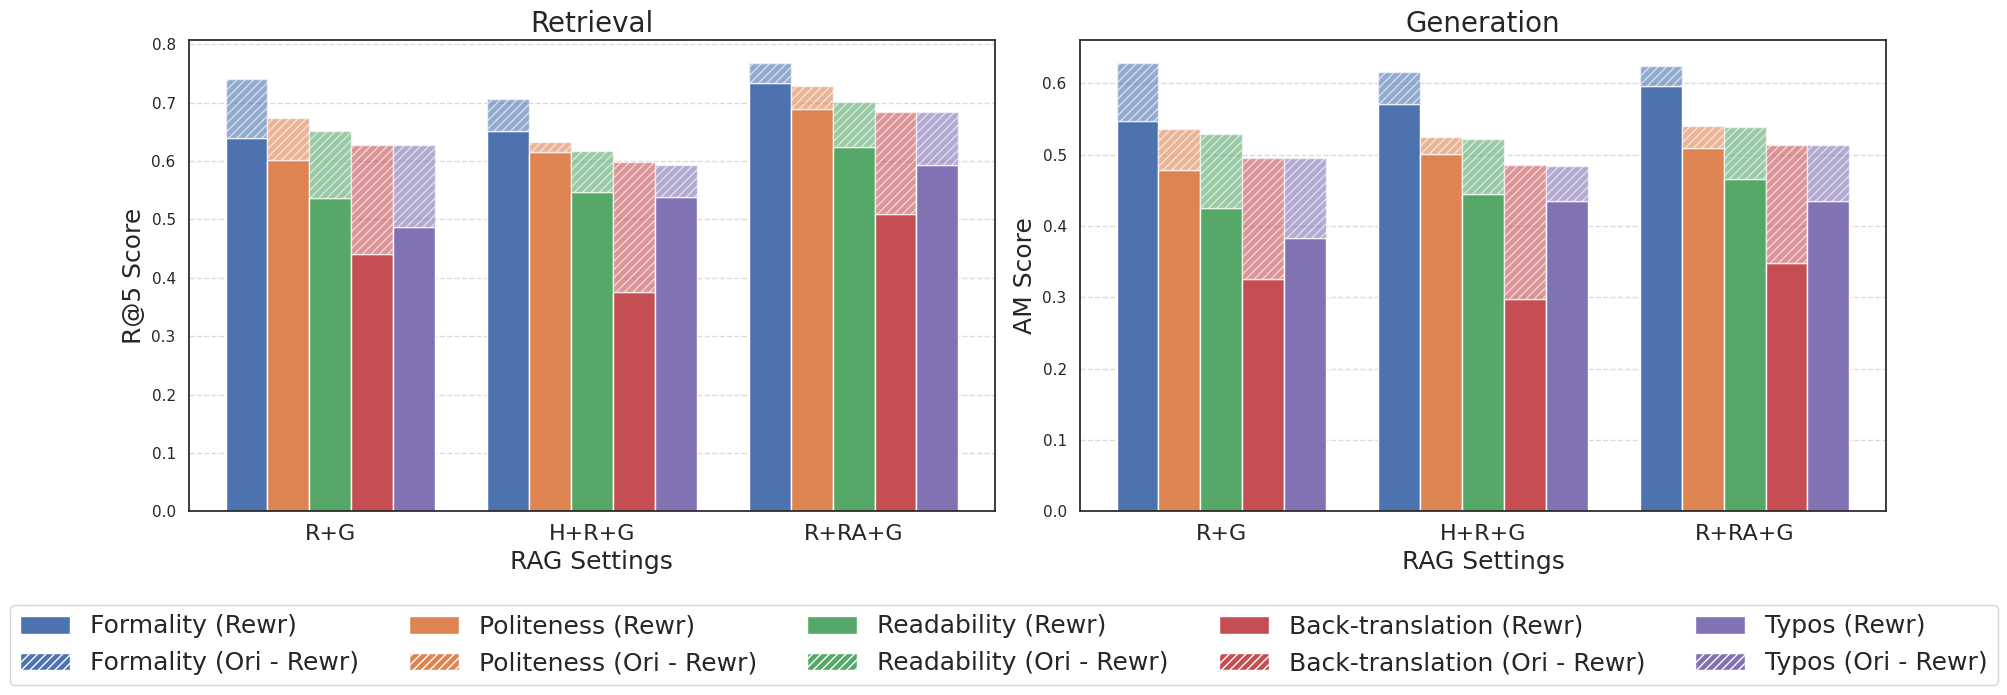

In [10]:
# Define settings and variables
linguistics = ['Formality', 'Politeness', 'Readability', 'Back-translation', 'Typos']
modified = ['Original', 'Rewritten']
rag_setting = ['R+G', 'H+R+G', 'R+RA+G']

sns.set_theme(style='white')
colors = list(sns.color_palette())
patterns = [ "/" , '//', "x" , "|" , "-" , "+" , "\\", "o", "O", ".", "*" ]

# Load your data
df = pd.read_csv('/data/group_data/maartens_lab_miis24/QL_result/gpt-4o-mini/RerankHyde_Combined.csv')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#################################
# Second plot: For 'R@5' scores
#################################
# Pivot the data for R@5 scores
df_r5 = df.pivot_table(
    index=['RAG', 'linguistics'], 
    columns='modified', 
    values='R@5'
).reset_index()
# Compute the absolute difference between Rewritten and Original scores
df_r5['abs_diff'] = abs(df_r5['Rewritten'] - df_r5['Original'])

ax_idx = 0
ax = axes[ax_idx]
x = np.arange(len(rag_setting))
width = 0.8 / len(linguistics)

# Loop over each linguistic metric and plot its bars
for i, ling in enumerate(linguistics):
    ling_data = df_r5[df_r5['linguistics'] == ling]
    r5_values = []
    diffs = []
    for dataset in rag_setting:
        dataset_data = ling_data[ling_data['RAG'] == dataset]
        if not dataset_data.empty:
            r5_values.append(dataset_data['Rewritten'].values[0])
            diffs.append(dataset_data['abs_diff'].values[0])
        else:
            r5_values.append(0)
            diffs.append(0)
    # Calculate bar positions for the current metric
    positions = x + (i - len(linguistics)/2 + 0.5) * width
    label_mod = ling if ax_idx == 0 else ""
    ax.bar(positions, r5_values, width=width, label=label_mod, color=colors[i])
    ax.bar(positions, diffs, bottom=r5_values, width=width, label=label_mod, color=colors[i], hatch='////', alpha=0.6)

ax.set_title('Retrieval', fontsize=20)
ax.set_xlabel('RAG Settings', fontsize=18)
ax.set_ylabel('R@5 Score', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(rag_setting, fontsize=16)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
# ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

#################################
# First plot: For 'AM' scores
#################################
# Pivot the data for AM scores
df_am = df.pivot_table(
    index=['RAG', 'linguistics'], 
    columns='modified', 
    values='AM'
).reset_index()
# Compute the absolute difference between Rewritten and Original scores
df_am['abs_diff'] = abs(df_am['Rewritten'] - df_am['Original'])

ax_idx = 1
ax = axes[ax_idx]
x = np.arange(len(rag_setting))
width = 0.8 / len(linguistics)

# Loop over each linguistic metric and plot its bars
for i, ling in enumerate(linguistics):
    ling_data = df_am[df_am['linguistics'] == ling]
    am_values = []
    diffs = []
    for dataset in rag_setting:
        dataset_data = ling_data[ling_data['RAG'] == dataset]
        if not dataset_data.empty:
            am_values.append(dataset_data['Rewritten'].values[0])
            diffs.append(dataset_data['abs_diff'].values[0])
        else:
            am_values.append(0)
            diffs.append(0)
    # Calculate bar positions for the current metric
    positions = x + (i - len(linguistics)/2 + 0.5) * width
    label_mod = ling if ax_idx == 0 else ""
    ax.bar(positions, am_values, width=width, label=label_mod, color=colors[i])
    ax.bar(positions, diffs, bottom=am_values, width=width, label=label_mod, color=colors[i], hatch='////', alpha=0.6)

ax.set_title('Generation', fontsize=20)
ax.set_xlabel('RAG Settings', fontsize=18)
ax.set_ylabel('AM Score', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(rag_setting, fontsize=16)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Create custom legend elements
legend_elements = []
for i, ling in enumerate(linguistics):
    # Add solid patch for "Rewritten" scores
    legend_elements.append(Patch(facecolor=colors[i], label=f"{ling} (Rewr)"))
    # Add hatched patch for "Original - Rewritten" difference
    legend_elements.append(Patch(facecolor=colors[i], hatch='////', label=f"{ling} (Ori - Rewr)"))

# Create a better organized legend - group by linguistic metric
fig.legend(handles=legend_elements, loc='outside upper center', ncol=5, fontsize=18, 
           bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.savefig('rerankhyde_comparison.pdf', bbox_inches='tight')